In [33]:
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import backend as K

In [34]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [2]:
root_directory = "dataset_train/*"
files = []

In [3]:
for f in glob.glob(root_directory):
    if os.path.isfile(f):
        files.append(os.path.basename(f))

In [4]:
files[:10]

['20_original_20_3.jpg_e3bd43f7-c0c7-4f59-9552-7b453097df0f.jpg',
 '1_original_1_4.jpg_79c157d4-a4d7-4548-bd7c-ea805f20c0af.jpg',
 '20_original_20_2.jpg_b4683fd6-0f25-414f-a4ca-58f8f8b323a8.jpg',
 '6_original_6_2.jpg_233c93b3-4422-4985-86e5-49894942f1df.jpg',
 '9_original_9_4.jpg_841ea43a-83a8-462a-b0bb-456c347326c1.jpg',
 '16_original_16_3.jpg_c7dbe38a-8214-40da-b475-bed4e031ac0e.jpg',
 '18_original_18_2.jpg_6094c620-11ac-47b5-81c5-16d67374f934.jpg',
 '24_original_24_4.jpg_90616efb-f4b9-44bd-8503-d9c65ce326ed.jpg',
 '21_original_21_2.jpg_997e2118-fd9d-4588-b862-8d2b900fd1a3.jpg',
 '22_original_22_4.jpg_519d6523-1946-4ccf-b57d-fe5283a31205.jpg']

In [5]:
len(files)

26000

In [6]:
data = pd.DataFrame()
data["file_basename"] = files
# data["file_no_extension"] = data.apply(lambda x: x["file_basename"].split('.')[0], axis=1)
# data["file_id"] = data.apply(lambda x: os.path.splitext(str(x["file_basename"].split('-')[1]))[0], axis=1)
data["target"] = data.apply(lambda x: x["file_basename"].split('_')[0], axis=1)

data["target"] = data["target"].astype(int)

data.head(100)

# data.iloc[0]

,file_basename,target
0,20_original_20_3.jpg_e3bd43f7-c0c7-4f59-9552-7...,20
1,1_original_1_4.jpg_79c157d4-a4d7-4548-bd7c-ea8...,1
2,20_original_20_2.jpg_b4683fd6-0f25-414f-a4ca-5...,20
3,6_original_6_2.jpg_233c93b3-4422-4985-86e5-498...,6
4,9_original_9_4.jpg_841ea43a-83a8-462a-b0bb-456...,9
...,...,...
95,19_original_19_3.jpg_1d7494ec-8c5b-45ed-a79b-e...,19
96,25_original_25_1.jpg_25fe5435-c6af-41ee-b1a4-c...,25
97,7_original_7_4.jpg_af56c320-bba4-4bc0-8799-cf5...,7
98,24_original_24_3.jpg_8e2dabb3-b2c2-4135-af92-8...,24


In [7]:
def preprocess(im):
    im = im/255
    # im -= .5
    return im

In [8]:
channel = 1
im_width = 100
im_height = 100
path = "dataset_train/"

In [9]:
# Loading the images
X = []
for img in data["file_basename"]:
    # import pdb; pdb.set_trace();
    im = Image.open(path + img).convert('L')
    im = im.resize((im_width,im_height), Image.ANTIALIAS)
    im = np.array(im)
    # X.append(preprocess(im).reshape((im_size, im_size, channel)))
    kk = preprocess(im).reshape((im_width, im_height, channel))
    X.append(np.array(kk))
    # print("HI")

X2 = np.asarray(X)

In [10]:
# train_ids = np.arange(1500) # num of pictures

# x_train, y1_train, y2_train = load_image_batch(train_ids)

X_train, X_test, y_train, y_test = train_test_split(X2, (data["target"]/25), test_size=0.1, random_state=42)

In [11]:
# inp = Input(shape=(im_width,im_height, channel))

# x = Conv2D(50, kernel_size=5, strides=2, activation='relu')(inp)
# x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
# x = BatchNormalization()(x)

# x = Conv2D(100, kernel_size=3, strides=1, activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = BatchNormalization()(x)

# x = Conv2D(150, kernel_size=3, strides=1, activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = BatchNormalization()(x)

# x = Conv2D(200, kernel_size=3, strides=1, activation='relu')(x)
# x = Dropout(.4)(x)

# x = Flatten()(x)

# radio_slider = Dense(100, activation='relu')(x)
# radio_slider = Dense(200, activation='relu')(radio_slider)
# radio_slider = Dense(1, activation='linear', name='radio_slider')(radio_slider)

# model = Model(inputs=inp, outputs=radio_slider)

# model.summary()

In [39]:
model = Sequential()

model.add(Conv2D(50, kernel_size=5, strides=2, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(im_width, im_height, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(100, kernel_size=3, strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(150, kernel_size=3, strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(200, kernel_size=3, strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Dropout(.4))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
# model.add(Dense(1, activation='linear'))
model.add(Dense(1, activation=LeakyReLU(alpha=0.1)))

In [43]:
adam = tf.keras.optimizers.Nadam(lr=.00001)
# model.compile(loss=['sparse_categorical_crossentropy', 'mse'], optimizer=adam, metrics=['accuracy', 'mae'])

# model.compile(loss='mse', optimizer=adam, metrics=['mae'])
model.compile(loss='mse', optimizer=adam, metrics=[coeff_determination])

In [44]:
# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# patient early stopping
#es = EarlyStopping(patience=5, monitor='val_mae', mode='min')
es = EarlyStopping(patience=5, monitor='val_loss', mode='min')

mc = ModelCheckpoint('best_model.h5', verbose=1, save_best_only=True)

In [45]:
# history = model.fit(X_train, [y_train], epochs=100, batch_size=32, callbacks=[es, mc])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/100
732/732 [==============================] - ETA: 0s - loss: 0.0090 - coeff_determination: 0.8950
Epoch 00001: val_loss improved from inf to 0.00281, saving model to best_model.h5
732/732 [==============================] - 127s 173ms/step - loss: 0.0090 - coeff_determination: 0.8950 - val_loss: 0.0028 - val_coeff_determination: 0.9674
Epoch 2/100
732/732 [==============================] - ETA: 0s - loss: 0.0051 - coeff_determination: 0.9406
Epoch 00002: val_loss improved from 0.00281 to 0.00132, saving model to best_model.h5
732/732 [==============================] - 124s 170ms/step - loss: 0.0051 - coeff_determination: 0.9406 - val_loss: 0.0013 - val_coeff_determination: 0.9847
Epoch 3/100
732/732 [==============================] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.9590
Epoch 00003: val_loss improved from 0.00132 to 0.00106, saving model to best_model.h5
732/732 [==============================] - 117s 160ms/step - loss: 0.0035 - coeff_determination: 0.9590 - va

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 50, 50)        1300      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 50)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 25, 25, 50)        200       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 100)       45100     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 12, 12, 100)       400       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 150)      

In [52]:
print(history.history.keys())

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


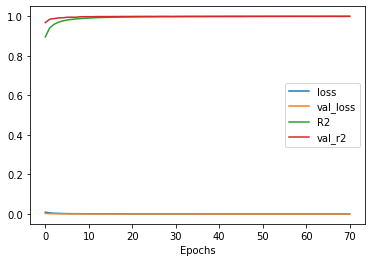

In [53]:
# plot training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
# plt.plot(history.history['mae'], label='mae')
# plt.plot(history.history['val_mae'], label='val_mae')
plt.plot(history.history['coeff_determination'], label='R2')
plt.plot(history.history['val_coeff_determination'], label='val_r2')

plt.xlabel("Epochs")
plt.legend()
plt.show()

In [54]:
# model.save("model.h5")
# saved_model = load_model('best_model.h5', custom_objects={'LeakyReLU': LeakyReLU})
saved_model = load_model('best_model.h5', custom_objects={'LeakyReLU': LeakyReLU, 'coeff_determination': coeff_determination})

In [55]:
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


In [56]:
score = saved_model.evaluate(X_train, y_train, verbose=2)
score

732/732 - 24s - loss: 1.2463e-05 - coeff_determination: 0.9999


[1.2462857739592437e-05, 0.9998534917831421]

## Testing

In [58]:
# saved_model = load_model('best_model.h5', custom_objects={'LeakyReLU': LeakyReLU})
saved_model = load_model('best_model.h5', custom_objects={'LeakyReLU': LeakyReLU, 'coeff_determination': coeff_determination})

In [59]:
samples_path = "dataset_test/"

def predict(ind, file_path):
                    
    im = Image.open(file_path + str(ind))
    plt.imshow(im, cmap='gist_gray')
    print('Input image:')
    plt.show()
    im = im.convert('L')
    im = im.resize((im_width,im_height), Image.ANTIALIAS)
    im = np.array(im)
    im = preprocess(im).reshape((1, im_width, im_height, channel))

    predicted_val = saved_model.predict(im)
    
    print(ind)
    print(int(predicted_val*25))
    print(predicted_val)

Input image:


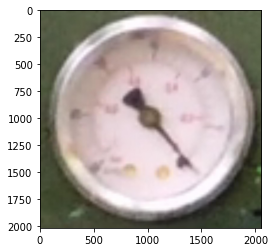

PRE_void_needle__18_06_13_02_13.jpg
2
[[0.11115225]]
######

Input image:


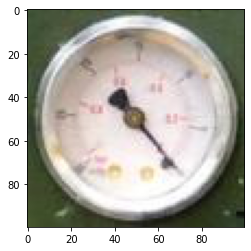

POST_void_needle__18_06_13_01_38.jpg
0
[[-0.00508022]]
######

Input image:


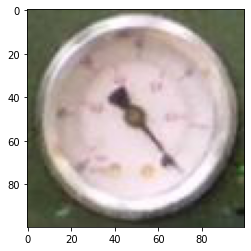

POST_void_needle__18_06_13_02_25.jpg
2
[[0.11402936]]
######

Input image:


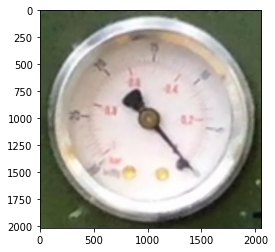

PRE_void_needle__18_06_13_01_25.jpg
0
[[-0.00533304]]
######



In [60]:
files = []

for f in glob.glob("dataset_test/*"):
    if os.path.isfile(f):
        files.append(os.path.basename(f))

#print(files)

# for img in random.sample(list(files), 9):
for img in list(files):
    predict(img, "dataset_test/")
    print("######\n")

## Testing on the test set from train test split

In [61]:
len(X_test)

2600

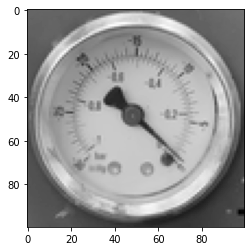

1
-----------------


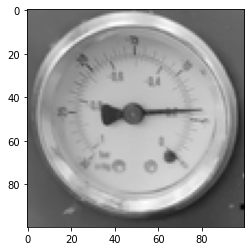

6
-----------------


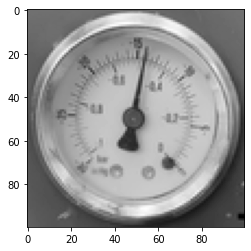

13
-----------------


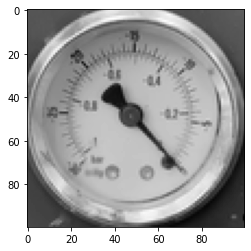

0
-----------------


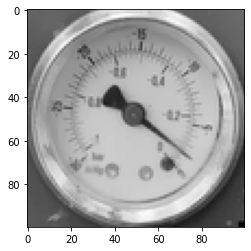

2
-----------------


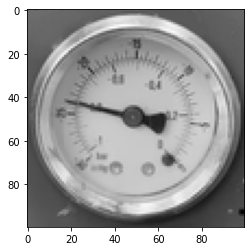

23
-----------------


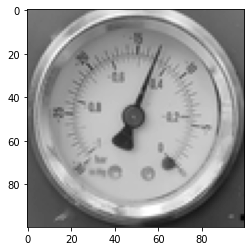

13
-----------------


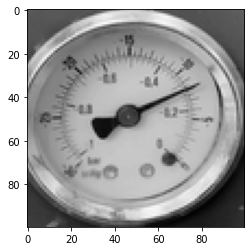

7
-----------------


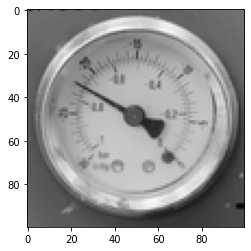

21
-----------------


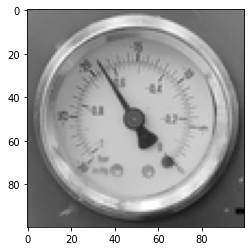

19
-----------------


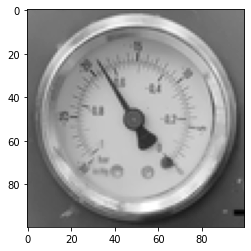

19
-----------------


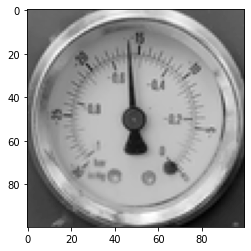

15
-----------------


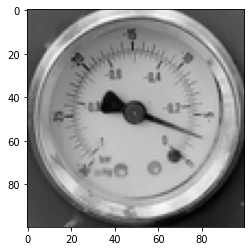

2
-----------------


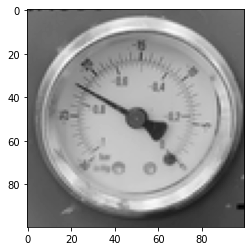

22
-----------------


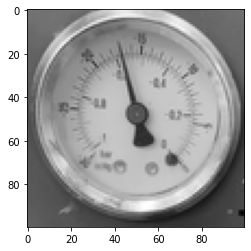

16
-----------------


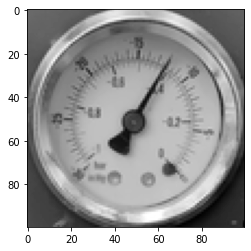

12
-----------------


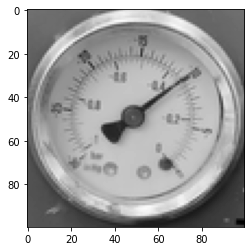

10
-----------------


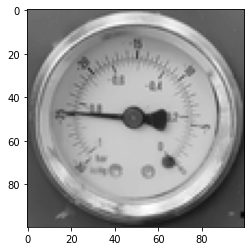

25
-----------------


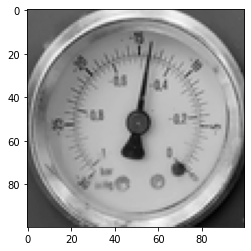

13
-----------------


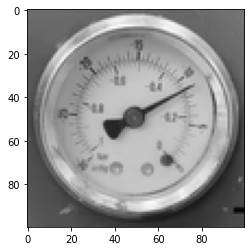

9
-----------------


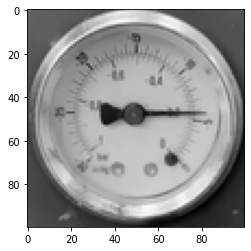

6
-----------------


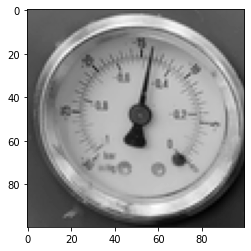

13
-----------------


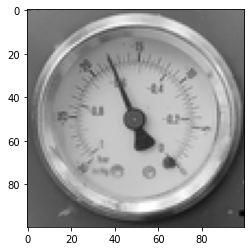

17
-----------------


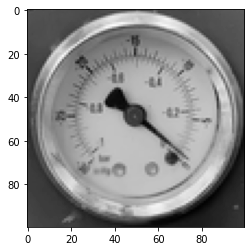

1
-----------------


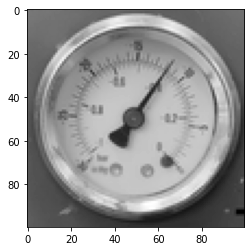

12
-----------------


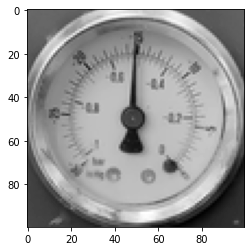

15
-----------------


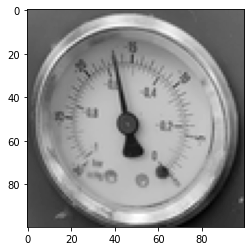

17
-----------------


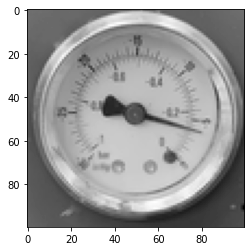

3
-----------------


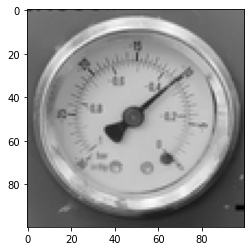

10
-----------------


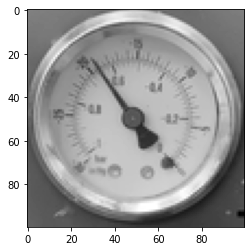

19
-----------------


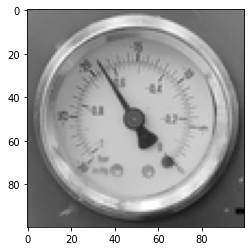

19
-----------------


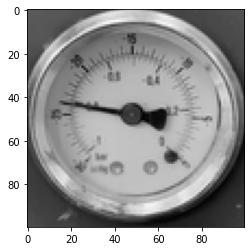

24
-----------------


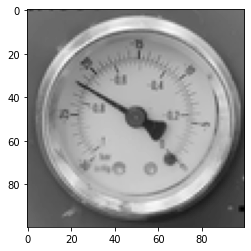

21
-----------------


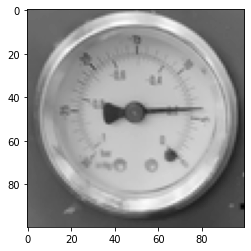

6
-----------------


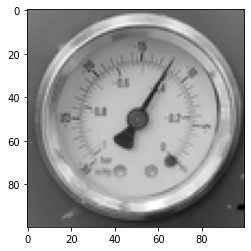

12
-----------------


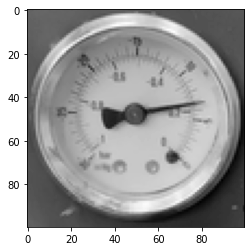

7
-----------------


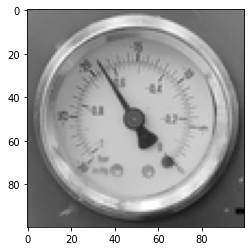

19
-----------------


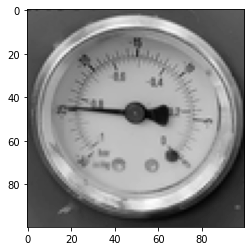

25
-----------------


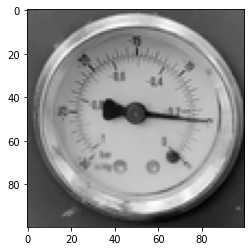

4
-----------------


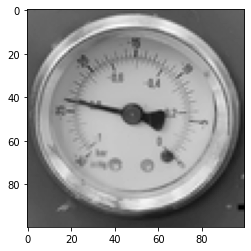

24
-----------------


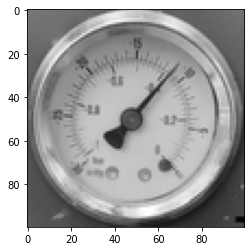

10
-----------------


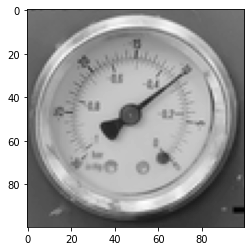

9
-----------------


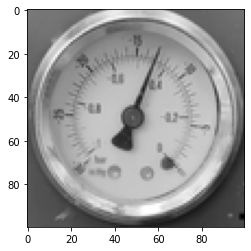

12
-----------------


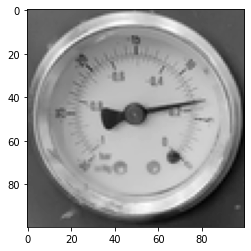

7
-----------------


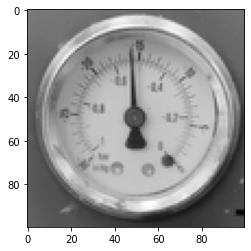

15
-----------------


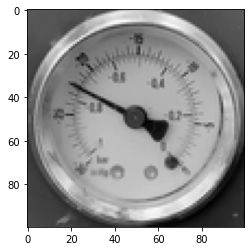

22
-----------------


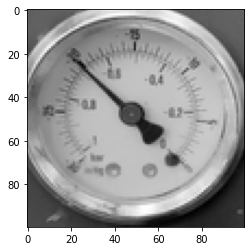

19
-----------------


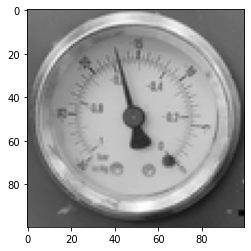

16
-----------------


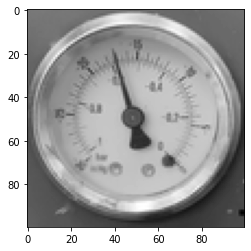

16
-----------------


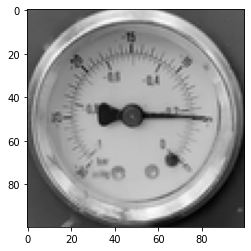

5
-----------------


In [62]:
for i in random.sample(list(X_test), 50):
    pruebame = i.reshape(1,im_width,im_height,1)
    predicted_val = saved_model.predict(pruebame)


    please = np.squeeze((i*255).astype(int))

    plt.imshow(please, cmap='gist_gray')
    plt.show()
    print(int(predicted_val*25))
    print("-----------------")